# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Using Python 3

In [91]:
import sys
print(sys.version)

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [92]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [93]:
%%bash
ls data

AllstarFull.csv
Appearances.csv
AwardsManagers.csv
AwardsPlayers.csv
AwardsShareManagers.csv
AwardsSharePlayers.csv
Batting.csv
BattingPost.csv
Fielding.csv
FieldingOF.csv
FieldingPost.csv
HallOfFame.csv
Managers.csv
ManagersHalf.csv
Master.csv
Pitching.csv
PitchingPost.csv
readme2013.txt
Salaries.csv
Schools.csv
SchoolsPlayers.csv
SeriesPost.csv
Teams.csv
TeamsFranchises.csv
TeamsHalf.csv
teams_with_salary.csv


In [94]:
salaries = pd.read_csv(os.path.join('data', 'Salaries.csv'))
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [95]:
teams = pd.read_csv(os.path.join('data', 'Teams.csv'))
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,NaN,NaN,Y,NaN,376,1281,410,66,27,9,46,23.0,56.0,NaN,NaN,NaN,266,137,4.95,27,0,0,747,329,3,53,16,194,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,NaN,NaN,N,NaN,310,1353,375,54,26,6,48,13.0,48.0,NaN,NaN,NaN,303,137,4.37,32,0,0,846,371,4,45,13,217,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [96]:
#your code here
summed_salaries = salaries.groupby(['yearID', 'teamID']).sum().reset_index()
summed_salaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [97]:
#your code here
print(f'length before merge: {len(teams)}')
teams_with_salary = pd.merge(teams, summed_salaries, how='inner', on=['yearID', 'teamID'])
print(f'length after merge: {len(teams_with_salary)}')
teams_with_salary.head(10)

length before merge: 2745
length after merge: 828


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1985,AL,TOR,TOR,E,1,161,80.0,99,62,Y,NaN,N,N,759,5508,1482,281,53,158,503,807.0,144.0,77.0,NaN,NaN,588,533,3.31,18,9,47,4344,1312,147,484,823,125,164.0,0.98,Toronto Blue Jays,Exhibition Stadium,2468925.0,104,103,TOR,TOR,TOR,8812550
1,1985,AL,NYA,NYY,E,2,161,80.0,97,64,N,NaN,N,N,839,5458,1458,272,31,176,620,771.0,155.0,53.0,NaN,NaN,660,590,3.69,25,9,49,4320,1373,157,518,907,123,172.0,0.97,New York Yankees,Yankee Stadium II,2214587.0,98,97,NYY,NYA,NYA,14238204
2,1985,AL,DET,DET,E,3,161,81.0,84,77,N,NaN,N,N,729,5575,1413,254,45,202,526,926.0,75.0,41.0,NaN,NaN,688,612,3.78,31,11,40,4368,1313,141,556,943,141,152.0,0.97,Detroit Tigers,Tiger Stadium,2286609.0,100,98,DET,DET,DET,10348143
3,1985,AL,BAL,BAL,E,4,161,81.0,83,78,N,NaN,N,N,818,5517,1451,234,22,214,604,908.0,69.0,43.0,NaN,NaN,764,694,4.38,32,6,33,4281,1480,160,568,793,115,168.0,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,11560712
4,1985,AL,BOS,BOS,E,5,163,81.0,81,81,N,NaN,N,N,800,5720,1615,292,31,162,562,816.0,66.0,27.0,NaN,NaN,720,659,4.06,35,8,29,4383,1487,130,540,913,145,161.0,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,10897560
5,1985,AL,ML4,MIL,E,6,161,80.0,71,90,N,NaN,N,N,690,5568,1467,250,44,101,462,746.0,69.0,34.0,NaN,NaN,802,701,4.39,34,5,37,4311,1510,175,499,777,142,153.0,0.97,Milwaukee Brewers,County Stadium,1360265.0,100,101,MIL,MIL,MIL,11284107
6,1985,AL,CLE,CLE,E,7,162,81.0,60,102,N,NaN,N,N,729,5527,1465,254,31,116,492,817.0,132.0,72.0,NaN,NaN,861,775,4.91,24,7,28,4263,1556,170,547,702,141,161.0,0.97,Cleveland Indians,Cleveland Stadium,655181.0,99,100,CLE,CLE,CLE,6551666
7,1985,AL,KCA,KCR,W,1,162,82.0,91,71,Y,NaN,Y,Y,687,5500,1384,261,49,154,473,840.0,128.0,48.0,NaN,NaN,639,567,3.49,27,11,41,4383,1433,103,463,846,127,160.0,0.98,Kansas City Royals,Royals Stadium,2162717.0,100,100,KCR,KCA,KCA,9321179
8,1985,AL,CAL,ANA,W,2,162,79.0,90,72,N,NaN,N,N,732,5442,1364,215,31,153,648,902.0,106.0,51.0,NaN,NaN,703,633,3.91,22,8,41,4371,1453,171,514,767,112,202.0,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,14427894
9,1985,AL,CHA,CHW,W,3,163,81.0,85,77,N,NaN,N,N,736,5470,1386,247,37,146,471,843.0,108.0,56.0,NaN,NaN,720,656,4.07,20,8,39,4353,1411,161,569,1023,111,152.0,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,9846178


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

** Thought Process: **

* Salaries are continuous and ordered
* Years are discrete and ordered
* Wins are discrete
* Three variables

=> Choose a scatterplot for each year

In [98]:
#your code here
unique_teams = teams_with_salary['teamID'].unique()
unique_years = teams_with_salary['yearID'].unique()
for x in [unique_teams, unique_years]:
    print(x)
    print(len(x))

['TOR' 'NYA' 'DET' 'BAL' 'BOS' 'ML4' 'CLE' 'KCA' 'CAL' 'CHA' 'MIN' 'OAK'
 'SEA' 'TEX' 'SLN' 'NYN' 'MON' 'CHN' 'PHI' 'PIT' 'LAN' 'CIN' 'HOU' 'SDN'
 'ATL' 'SFN' 'FLO' 'COL' 'ANA' 'TBA' 'MIL' 'ARI' 'LAA' 'WAS' 'MIA']
35
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013]
29


# Would I submit this to grading?
# Make this acceptable for grading before checking the answer.
# Mark myself.

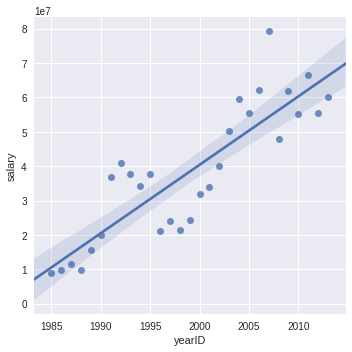

In [99]:
# Just plot the Oakland baseball team first, then add other teams onto the figure.
oakland = teams_with_salary[teams_with_salary['teamID'] == 'OAK']
# print(oakland.head())
# seaborn
sns.lmplot(x='yearID', y='salary', data=oakland)
plt.show()

ML4 raised a ValueError. Probably only has salaries for some years
CAL raised a ValueError. Probably only has salaries for some years
MON raised a ValueError. Probably only has salaries for some years
FLO raised a ValueError. Probably only has salaries for some years
COL raised a ValueError. Probably only has salaries for some years
ANA raised a ValueError. Probably only has salaries for some years
TBA raised a ValueError. Probably only has salaries for some years
MIL raised a ValueError. Probably only has salaries for some years
ARI raised a ValueError. Probably only has salaries for some years
LAA raised a ValueError. Probably only has salaries for some years
WAS raised a ValueError. Probably only has salaries for some years
MIA raised a ValueError. Probably only has salaries for some years


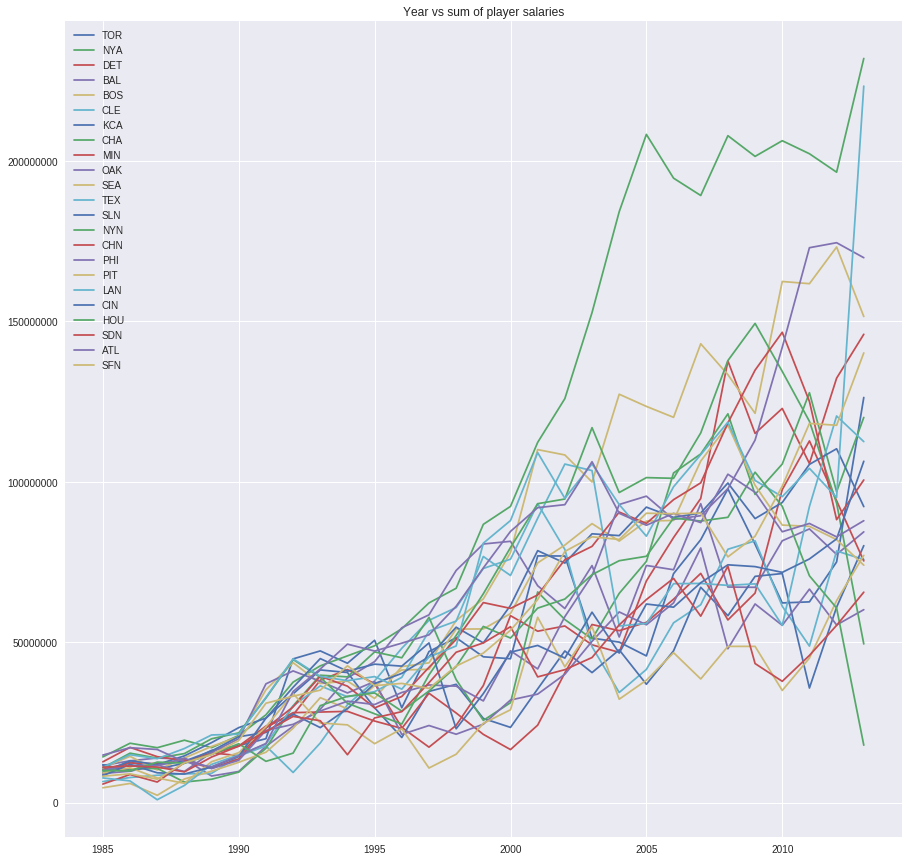

In [100]:
# matplotlib
fig = plt.figure(figsize=(15, 15))
for team in unique_teams:
    current_team = teams_with_salary[teams_with_salary['teamID'] == team]
    ax = plt.axes()
    try:
        if team == 'OAK':
            ax.plot(unique_years, current_team.loc[:, 'salary'], label='OAK', marker='+')
        else:
            ax.plot(unique_years, current_team.loc[:, 'salary'], label=team)
    except ValueError as e:
        print(f'{team} raised a ValueError. Probably only has salaries for some years')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Year vs sum of player salaries')
plt.legend(loc='best')
plt.show()

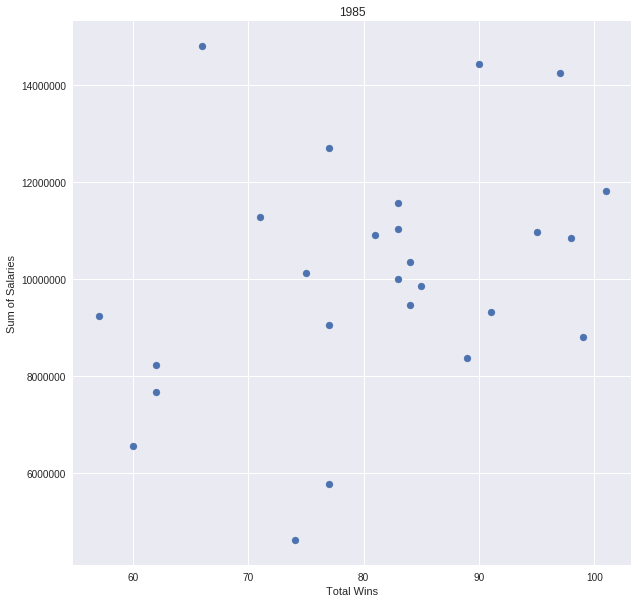

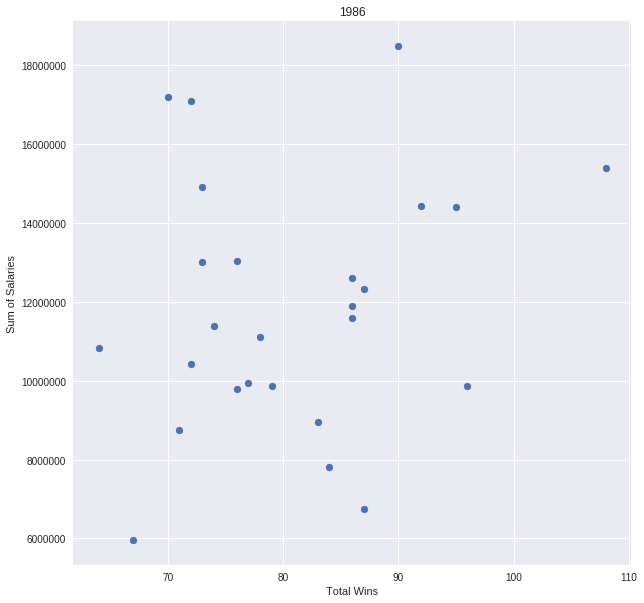

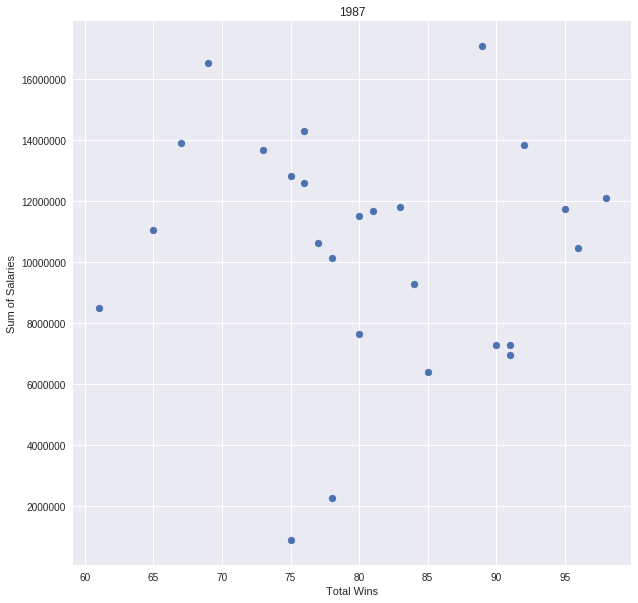

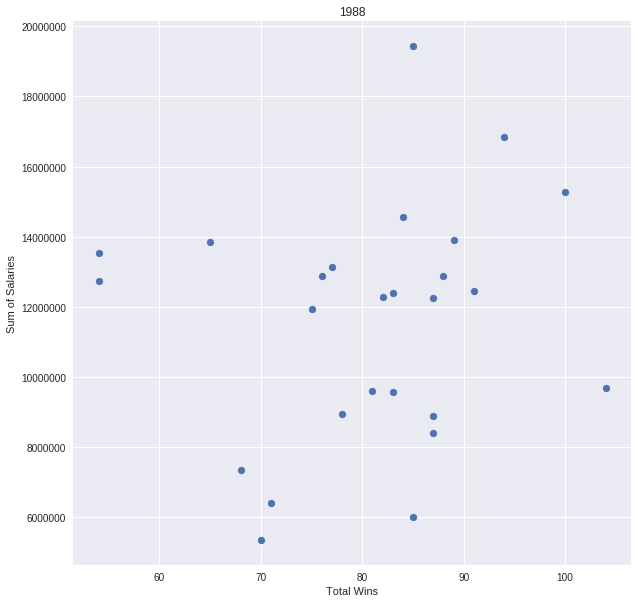

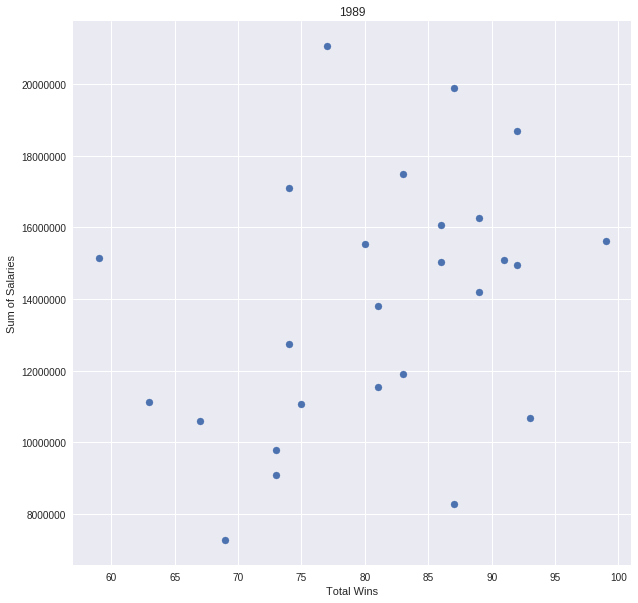

In [114]:
def scatter_plot(year: int, teams_with_salary):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    current_year = teams_with_salary[teams_with_salary['yearID'] == year]
    
    ax.scatter(current_year['W'], current_year['salary'])
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.set_title(year)
    ax.set_ylabel('Sum of Salaries')
    ax.set_xlabel('Total Wins')
    plt.show()

for year in unique_years[:5]:
    scatter_plot(year, teams_with_salary)

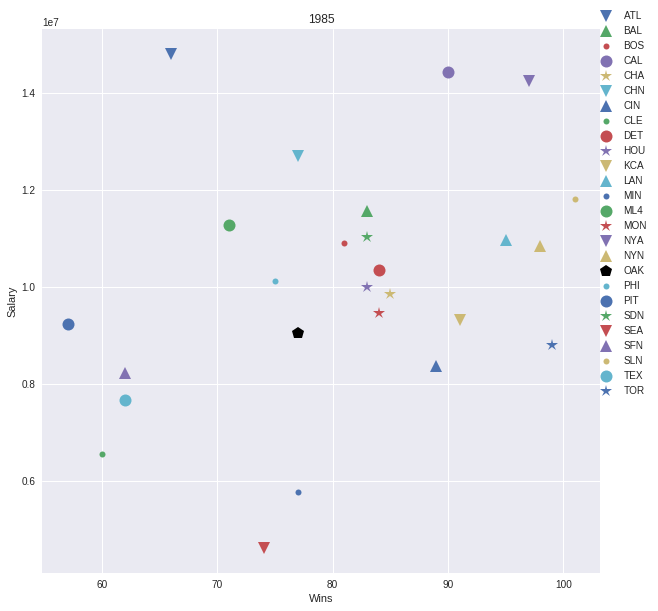

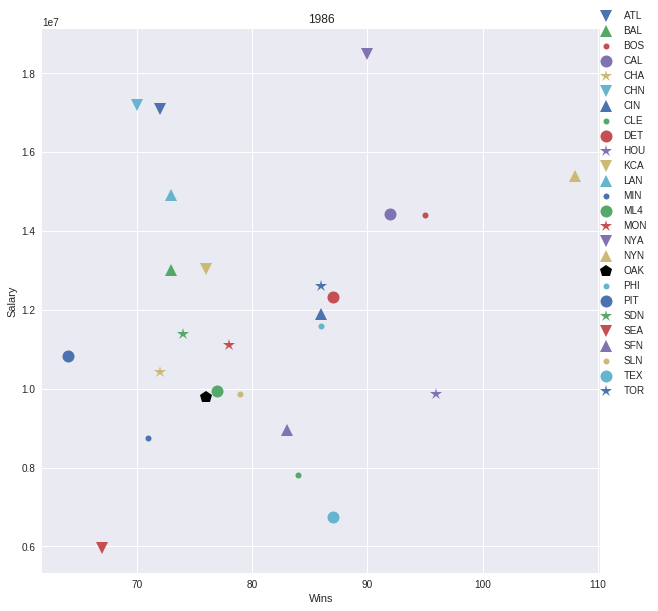

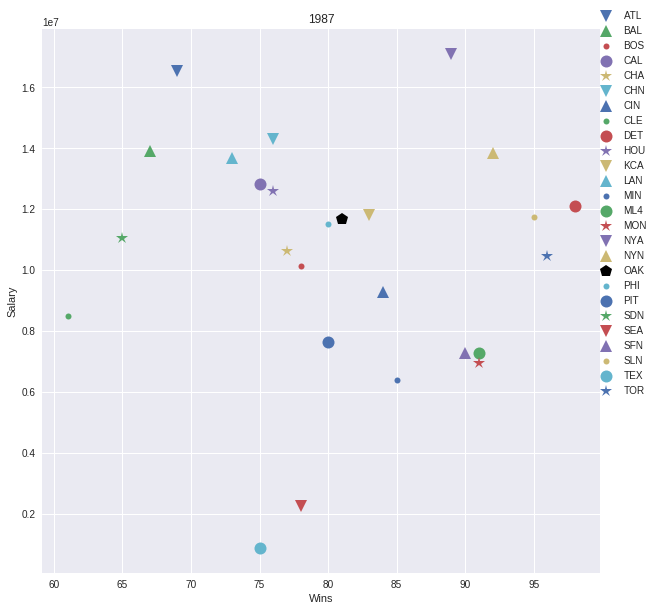

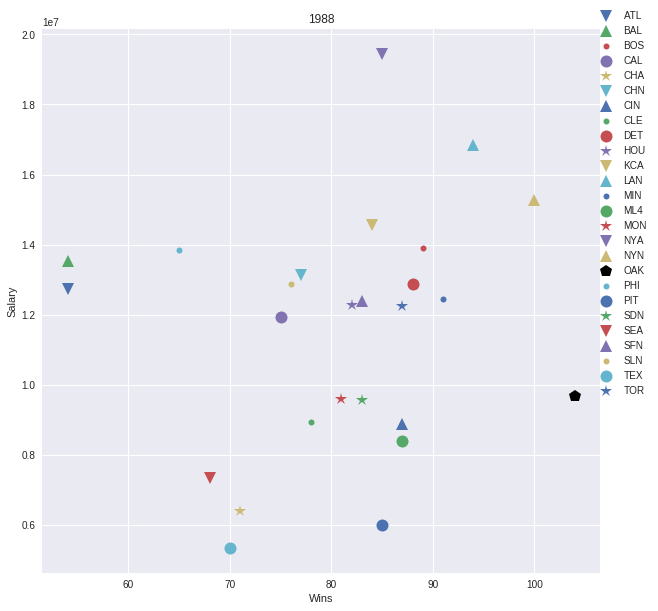

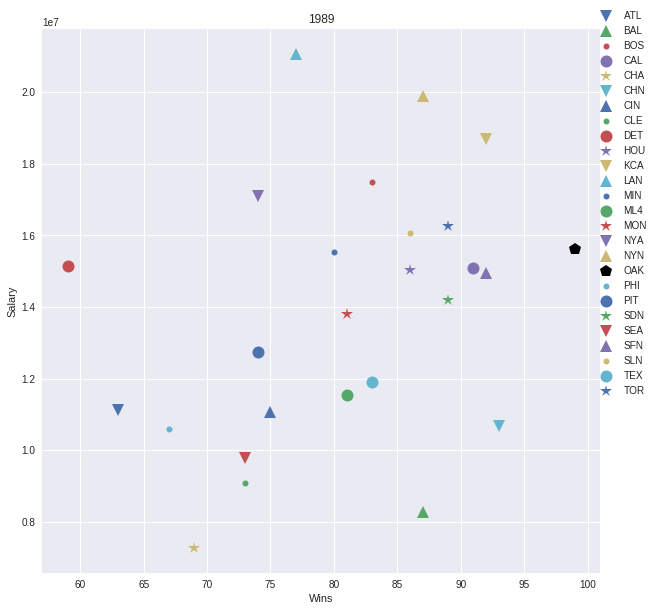

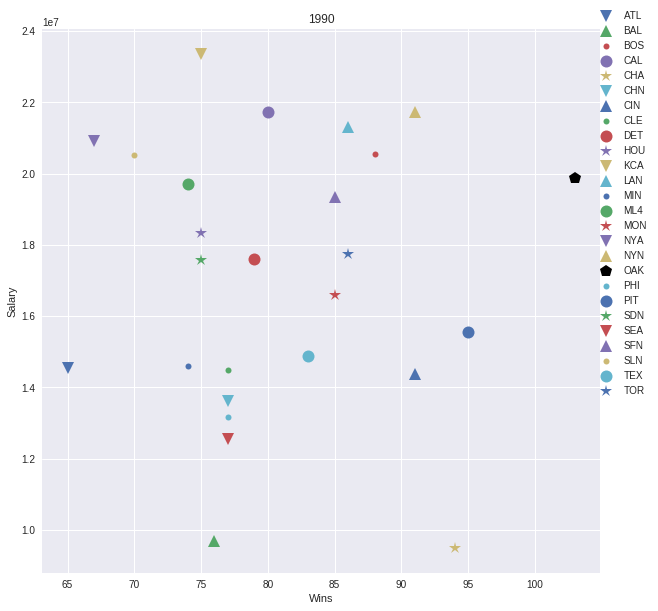

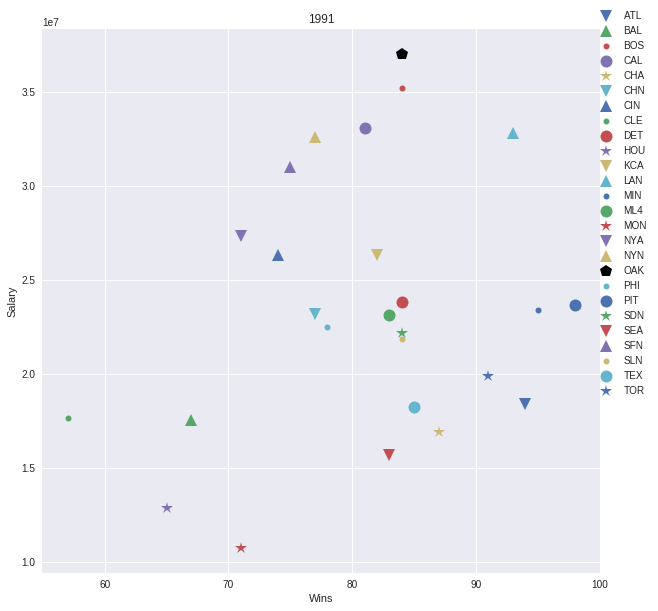

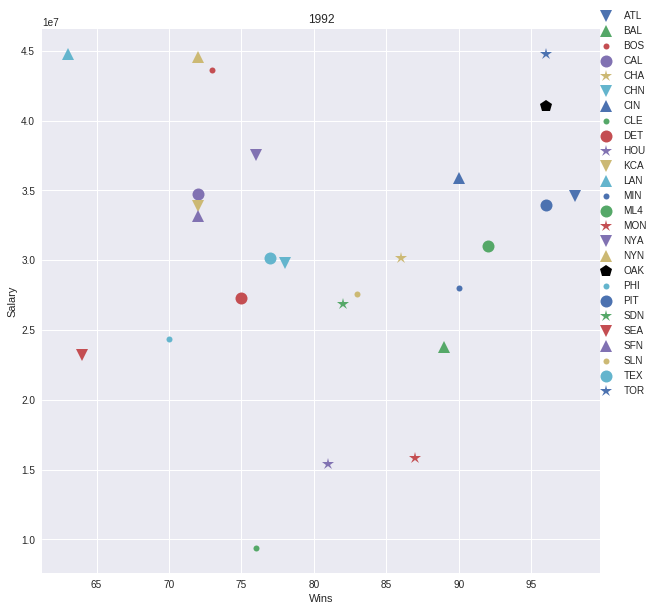

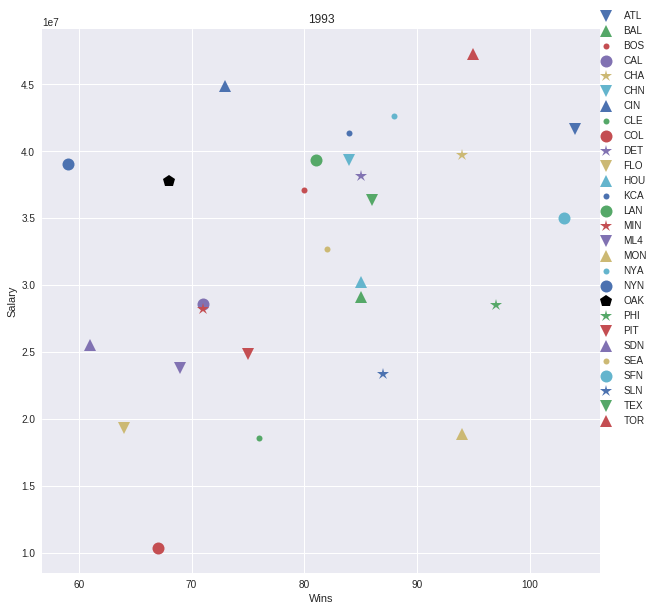

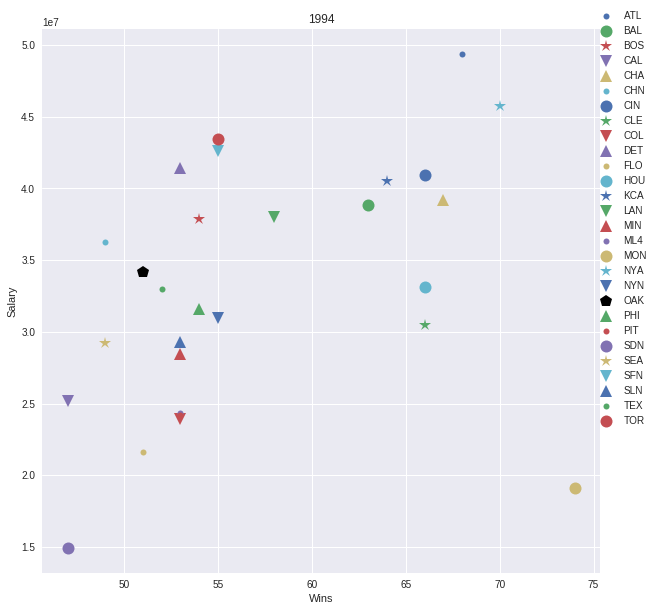

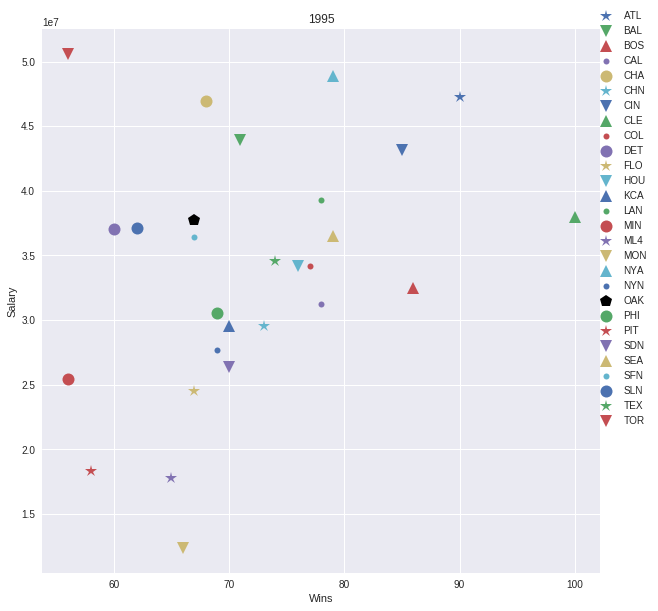

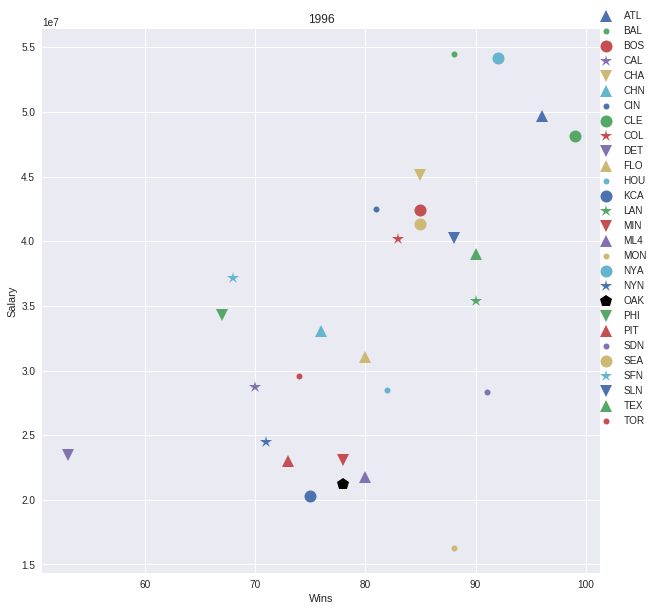

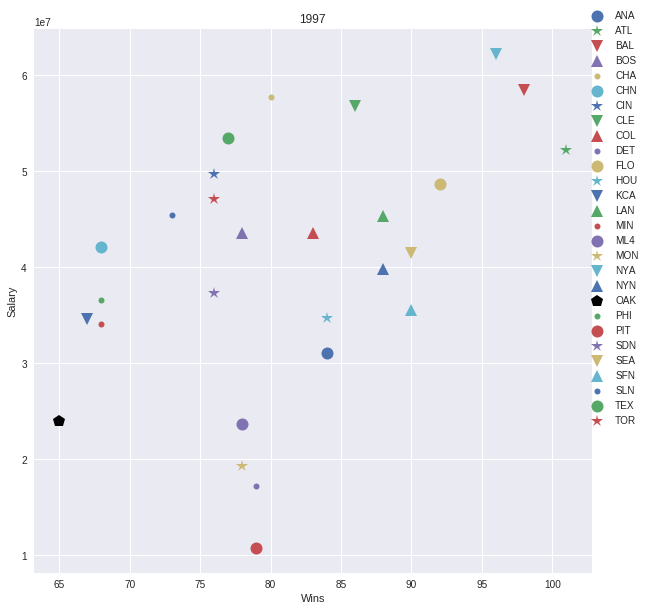

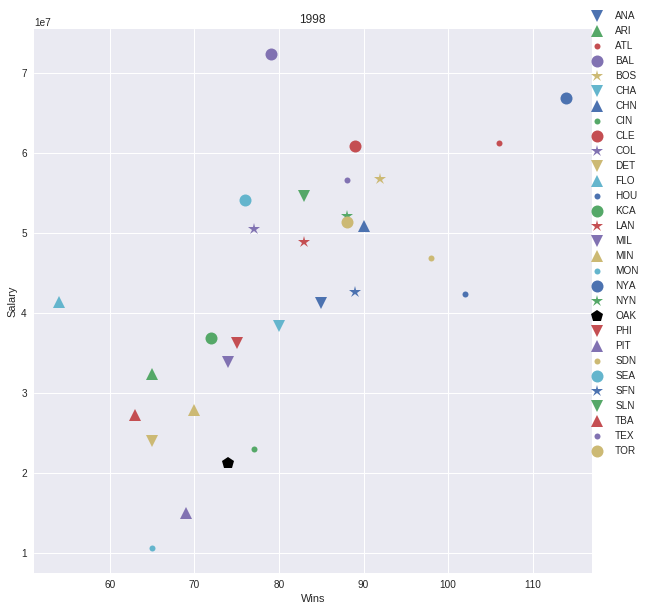

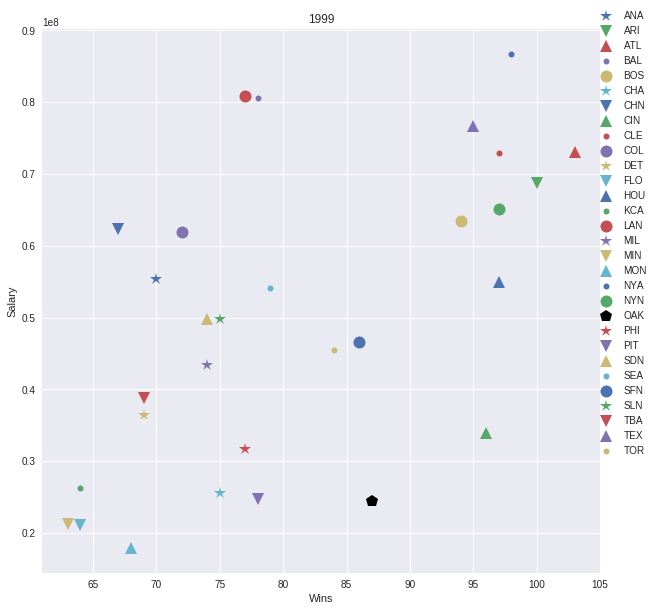

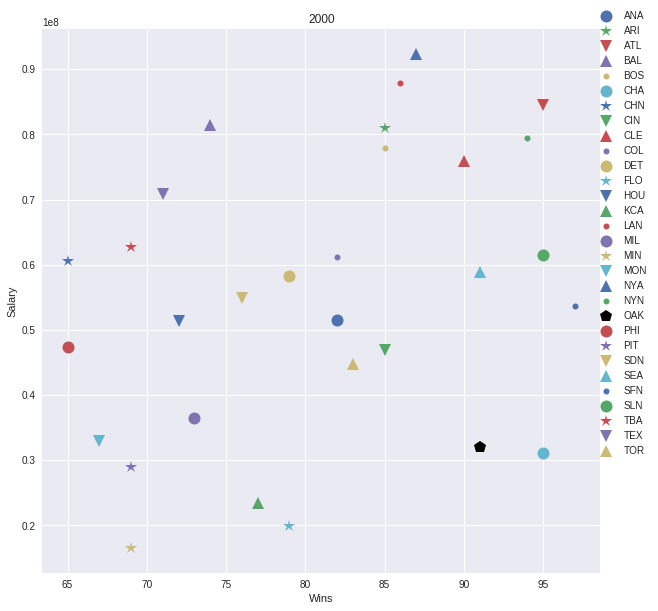

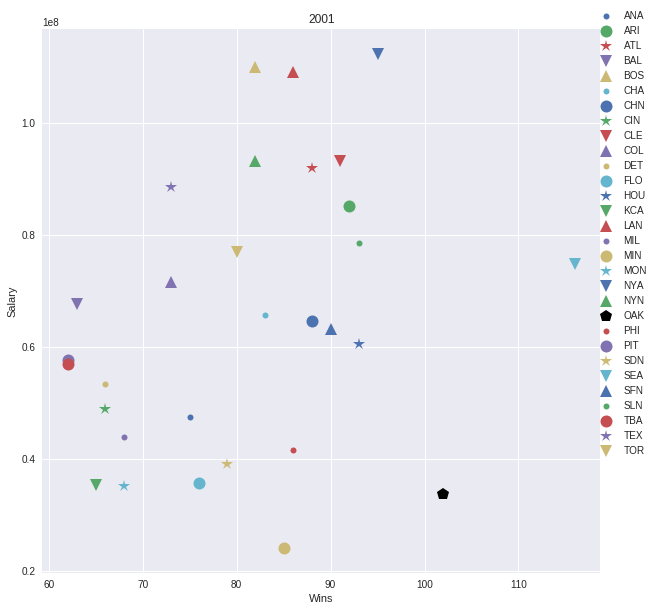

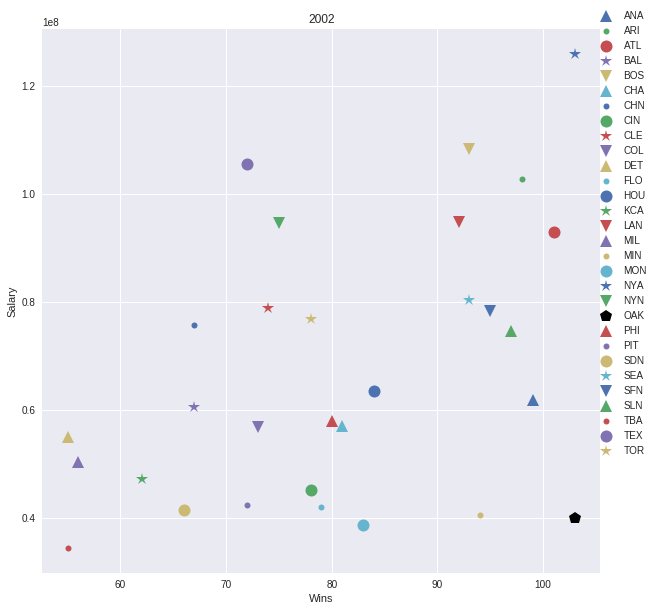

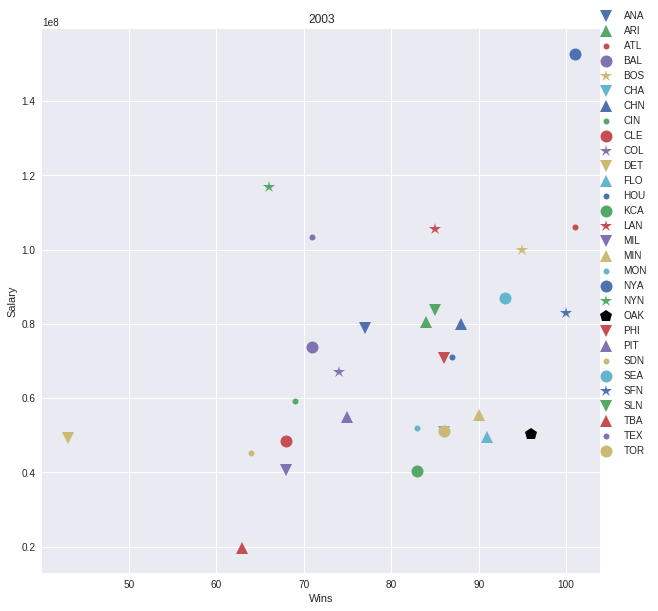

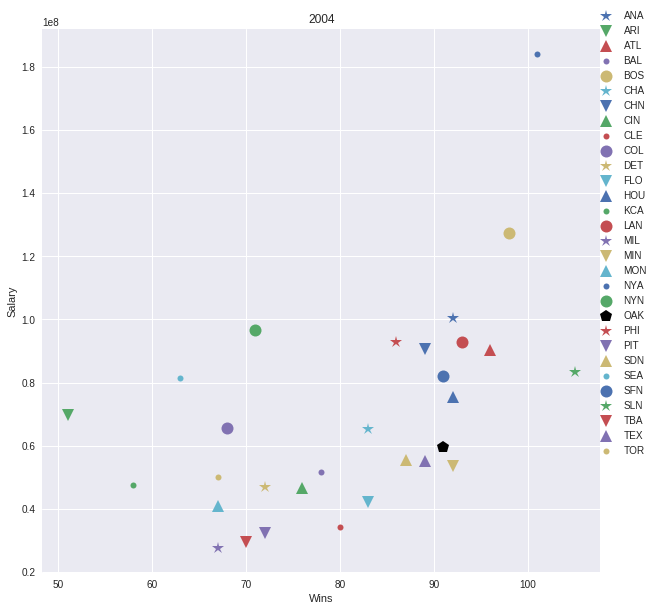

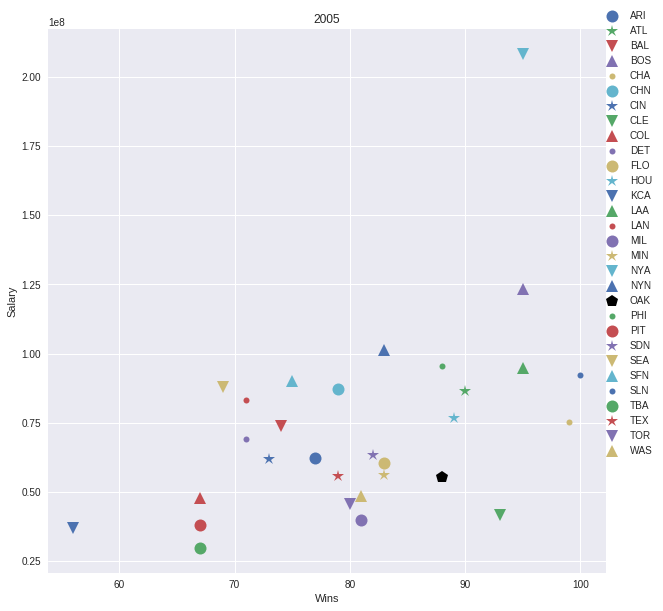

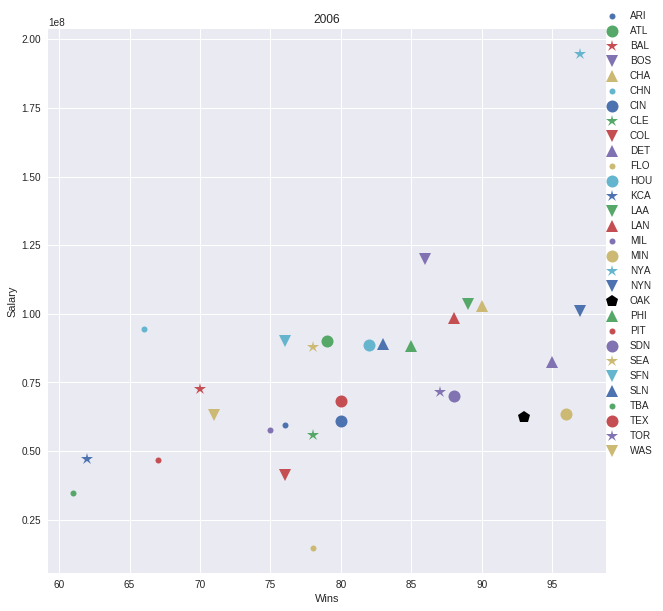

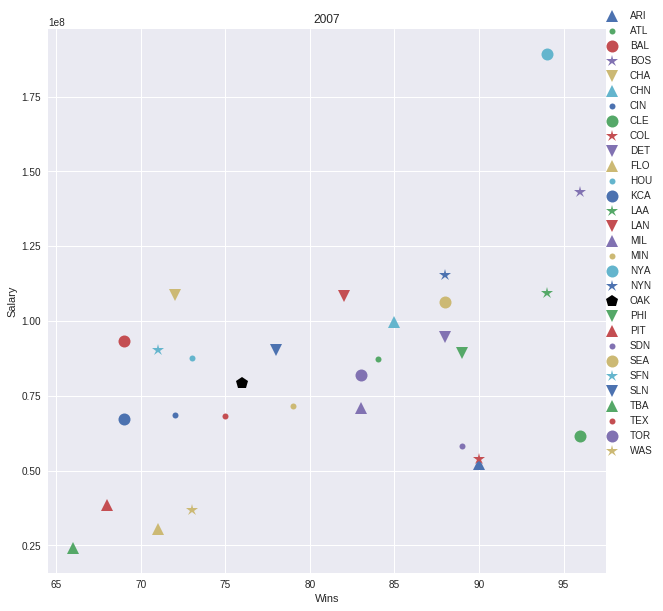

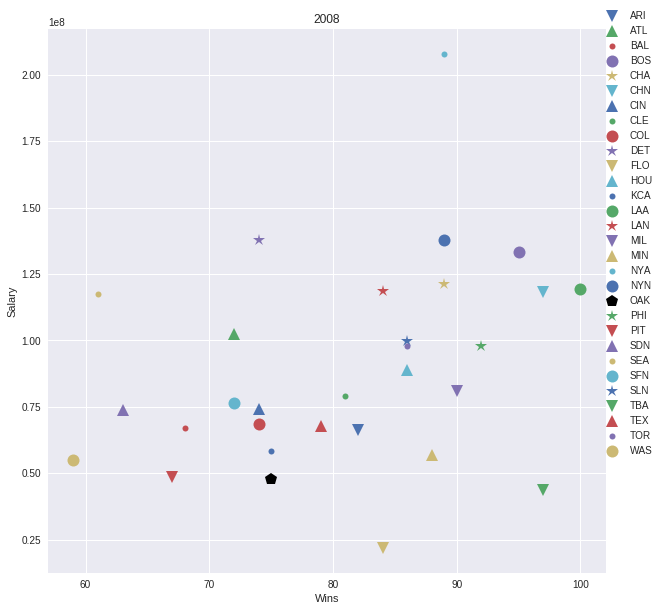

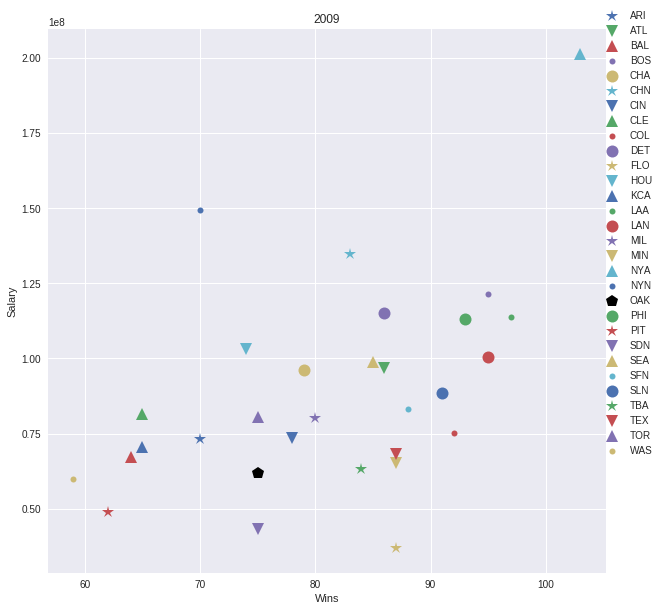

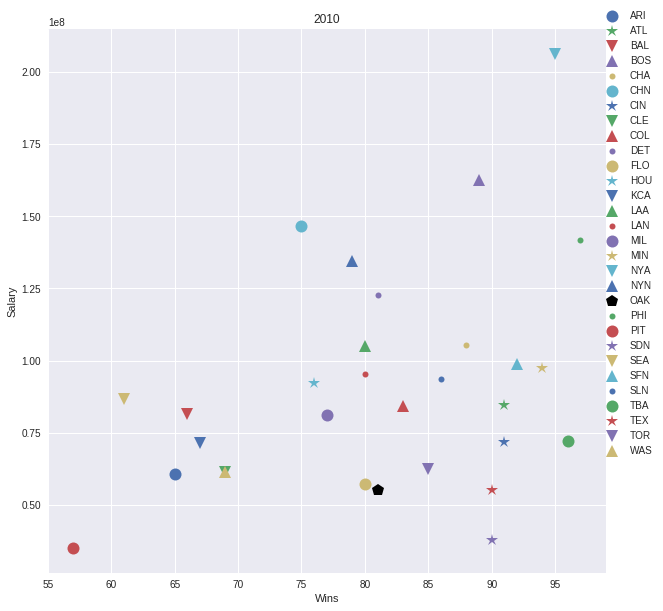

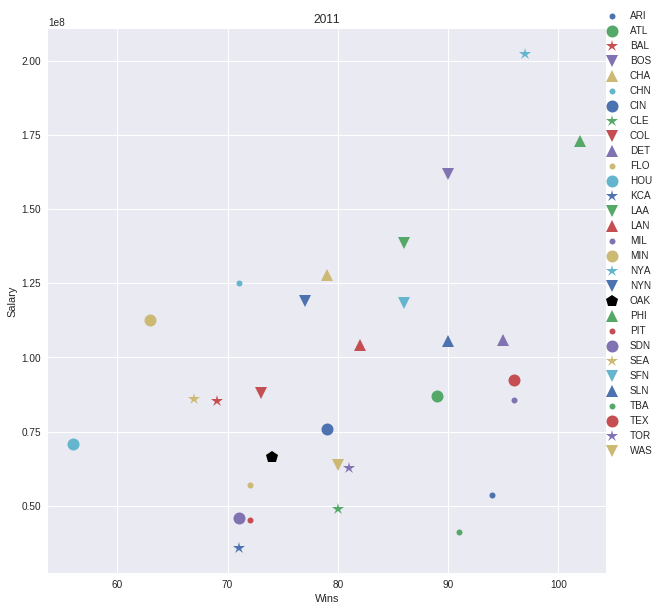

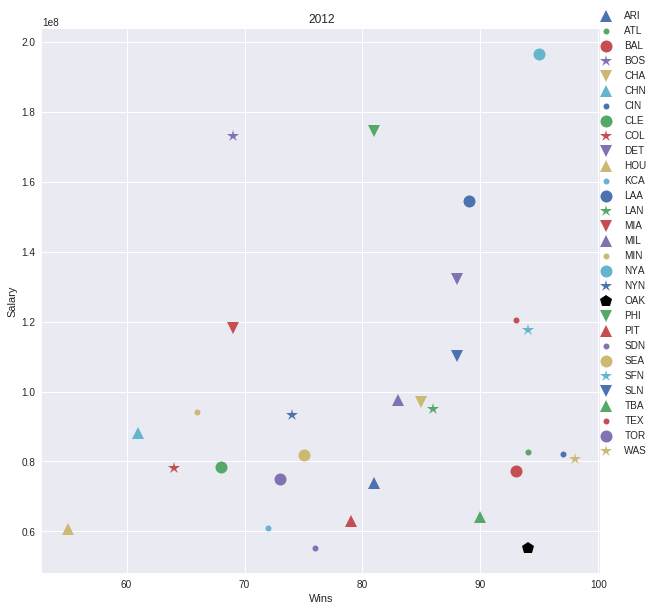

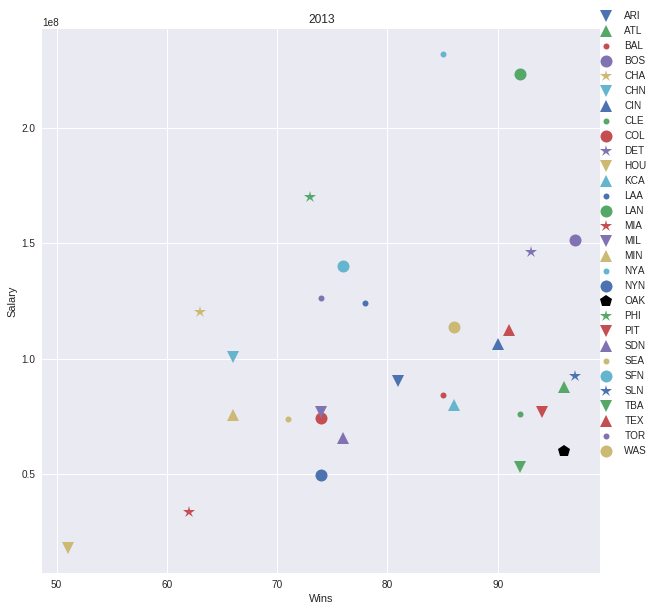

In [133]:
import itertools
marker = itertools.cycle(('v', '^', '.', 'o', '*')) 
for year in unique_years:
    current_year = teams_with_salary[teams_with_salary['yearID'] == year]
    grouped = current_year.groupby('teamID')
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.set_title(year)
    ax.set_xlabel('Wins')
    ax.set_ylabel('Salary')
    for name, group in grouped:
        if name == 'OAK':
            # Make Oakland a back pentagon
            # ms == marker size
            ax.plot(group['W'], group['salary'], marker='p', linestyle='', color='k', markersize=12, label=name)
        else:
            ax.plot(group['W'], group['salary'], marker=next(marker), linestyle='', ms=12, label=name)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()


In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end?

1998-1990, 2000-2006, 2012-2013 were years in which the Oakland baseball team had a high number of wins, but a low total salary.

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

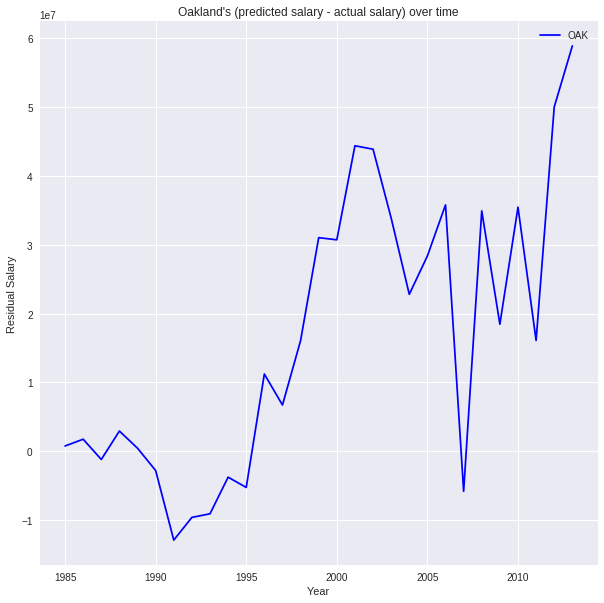

In [169]:
#your code here

from scipy import stats
# do an OLS for each year, plug in Oakland's wins into the eqn to see
# what it's salary should have been. Calculate pred(salary) - actual(salary)
# plot res(salary). If pred >> actual, then Oakland got lots of wins
# for a comparatively low total salary.

residual_salary_list = []

for year in unique_years:
    current_year = teams_with_salary[teams_with_salary['yearID'] == year]

    slope, intercept, r_value, p_value, std_err = \
        stats.linregress(current_year['W'], current_year['salary'])
#     print(slope, intercept, r_value, p_value, std_err)

    oakland_row = current_year[current_year['teamID'] == 'OAK']
    # is there a better way to select a scalar from a one-row
    # horizontal dataframe?
    # can do oakland_row['W'].values[0]
    oakland_wins = oakland_row.iloc[0, oakland_row.columns.get_loc('W')]
    oakland_wins

    predicted_oakland_salary = intercept + oakland_wins * slope
    actual_oakland_salary = oakland_row.iloc[0, oakland_row.columns.get_loc('salary')]
    residual_oakland_salary = predicted_oakland_salary - actual_oakland_salary
    # is there a better way to do this whole process in general?
#     print(f'Predicted oakland salary is {predicted_oakland_salary}')
#     print(f'Actual oakland salary is {actual_oakland_salary}')
#     print(f'Residual oakland salary is {residual_oakland_salary}')
    residual_salary_list.append(residual_oakland_salary)
    
# print(residual_salary_list)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
# use a line graph to see a trend over time
ax.plot(unique_years, residual_salary_list, label='OAK', color='blue')
ax.set_ylabel('Residual Salary')
ax.set_xlabel('Year')
ax.set_title('Oakland\'s (predicted salary - actual salary) over time')
ax.legend()
plt.show()

# ssss
# This doesn't seem to line up with my previous scatterplots...
# Figure out what's going on

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


* Some teams didn't have salaries for later years. The team probably disbanded.

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [103]:
#your code here
print(os.path.abspath(os.curdir))
countries = pd.read_csv(os.path.join('..', '..', '2014_data', 'countries.csv'))
countries.head()

/home/andy/Documents/github-repositories/cs109/2014/homework


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [104]:
#your code here
income = pd.read_excel(os.path.join('..', '..', '2014_data', 'indicator gapminder gdp_per_capita_ppp.xlsx'))
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,607.0,609.0,611.0,613.0,615.0,617.0,619.0,621.0,623.0,625.0,627.0,630.0,632.0,634.0,636.0,638.0,640.0,643.0,645.0,647.0,649.0,651.0,654.0,656.0,658.0,660.0,663.0,665.0,...,1168.0,1173.0,1187.0,1178.0,1174.0,1092.0,1046.0,1137.0,1170.0,1201.0,1231.0,1119.0,1179.0,1155.0,1158.0,1284.0,1402.0,1454.0,1429.0,1384.0,1486.0,1230.0,1113.0,1087.0,1028.0,1022.0,941.0,810.0,725.0,872.0,895.0,921.0,947.0,972.0,962.0,862.0,1053.0,1097.0,1067.0,1146.0,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,671.0,672.0,674.0,676.0,677.0,679.0,680.0,682.0,683.0,685.0,686.0,688.0,689.0,691.0,693.0,694.0,696.0,697.0,699.0,701.0,702.0,704.0,705.0,707.0,709.0,710.0,712.0,713.0,...,3242.0,3359.0,3475.0,3587.0,3712.0,3849.0,3988.0,4174.0,4177.0,4178.0,4182.0,4188.0,4194.0,4201.0,4218.0,4227.0,4237.0,4248.0,4259.0,4267.0,4281.0,4294.0,4307.0,4325.0,4350.0,3081.0,2877.0,3172.0,3457.0,3941.0,4326.0,3909.0,4434.0,4912.0,5305.0,5730.0,5913.0,6274.0,6672.0,7075.0,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,725.0,726.0,727.0,728.0,729.0,730.0,731.0,732.0,733.0,734.0,735.0,743.0,751.0,759.0,768.0,776.0,784.0,793.0,802.0,810.0,819.0,828.0,837.0,846.0,855.0,865.0,874.0,884.0,893.0,903.0,913.0,923.0,933.0,943.0,953.0,964.0,974.0,985.0,996.0,...,5478.0,5811.0,6319.0,6747.0,7227.0,6427.0,7556.0,7581.0,7812.0,8119.0,8400.0,8888.0,9730.0,10293.0,10166.0,10160.0,10477.0,10696.0,10947.0,11030.0,10722.0,10378.0,9888.0,10115.0,10113.0,9748.0,9693.0,9279.0,9006.0,9168.0,9375.0,9322.0,9646.0,9810.0,9885.0,10203.0,10634.0,11251.0,11575.0,12077.0,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [105]:
#your code here
income = income.T.reset_index()
income.columns = income.iloc[0]
income = income.drop(0, axis=0).reset_index(drop=True)
income.head()

,GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,Christmas Island,Cocos Island,Colombia,Comoros,...,Spain,Sri Lanka,Sudan,Suriname,Svalbard,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
0,1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,1507,514,833,815,1848,775,1445,1235,876,913,608,2412,579,597,1227,629,854,669,397,1109,NaN,1512,1089,480,418,903,626,1314,529,1039,424,418,NaN,1026,985,NaN,NaN,963,696,...,1518,898,518,1636,NaN,490,1414,2701,1081,996,556,562,931,521,682,NaN,663,NaN,1230,716,1221,943,487,719,464,763,998,3431,2128,1758,NaN,502,NaN,585,682,1220,NaN,NaN,861,NaN,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1,1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,1508,514,833,816,1855,775,1445,1240,876,914,608,2413,579,597,1227,629,854,669,397,1109,NaN,1512,1089,480,418,904,626,1322,529,1039,424,418,NaN,1026,985,NaN,NaN,963,697,...,1518,898,518,1637,NaN,490,1402,2701,1081,996,557,562,932,522,683,NaN,663,NaN,1230,716,1221,944,487,719,464,764,1001,3439,2168,1758,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
2,1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,1508,514,833,818,1863,775,1445,1246,876,914,608,2413,579,597,1228,630,854,669,397,1109,NaN,1512,1089,480,419,904,626,1330,529,1039,424,418,NaN,1027,985,NaN,NaN,963,697,...,1518,898,518,1637,NaN,490,1467,2702,1081,996,557,562,932,523,683,NaN,663,NaN,1231,716,1222,945,487,719,464,765,1005,3450,2203,1758,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
3,1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,1508,514,833,820,1870,775,1446,1251,876,914,609,2413,579,597,1228,630,854,669,397,1109,NaN,1513,1089,480,419,904,626,1339,529,1039,424,418,NaN,1027,985,NaN,NaN,963,698,...,1518,898,518,1637,NaN,490,1453,2702,1082,996,557,562,932,524,683,NaN,663,NaN,1231,716,1222,946,487,719,464,766,1009,3339,2167,1759,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN
4,1804,NaN,603,NaN,668,719,NaN,1206,628,NaN,757,1508,514,833,822,1878,775,1446,1256,876,914,609,2414,579,597,1228,630,854,669,397,1109,NaN,1513,1090,480,420,904,626,1347,530,1040,424,418,NaN,1027,985,NaN,NaN,963,699,...,1519,899,519,1637,NaN,490,1358,2703,1082,996,557,562,932,525,683,NaN,663,NaN,1231,716,1222,947,487,719,464,767,1013,3291,2166,1759,NaN,503,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,887,NaN,670,873,NaN,508,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [106]:
#your code here

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [107]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

"\nFunction\n--------\nmergeByYear\n\nReturn a merged DataFrame containing the income, \ncountry name and region for a given year. \n\nParameters\n----------\nyear : int\n    The year of interest\n\nReturns\n-------\na DataFrame\n   A pandas DataFrame with three columns titled \n   'Country', 'Region', and 'Income'. \n\nExample\n-------\n>>> mergeByYear(2010)\n"

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [108]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [109]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

'\nFunction\n--------\nratioNormals\n\nReturn ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a) as function of \n    the difference in the average of X \n    and the average of Y. \n\nParameters\n----------\ndiff : difference in the average of X \n    and the average of Y. \na : cutoff value\n\nReturns\n-------\nReturns ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a)\n    \nExample\n-------\n>>> ratioNormals(diff = 1, a = 2)\n'

In [110]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [111]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [112]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [113]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
